In [1]:
import os
import sys

In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [3]:
if not os.path.abspath(os.curdir).endswith('diamond'):
    os.chdir('./AI-MarioKart64/diamond')

In [4]:
os.path.abspath(os.curdir)

'/home/mluser/git/dweam/AI-MarioKart64/diamond'

In [5]:
!~/.cargo/bin/bat "./config/env/csgo.yaml"

───────┬────────────────────────────────────────────────────────────────────────
       │ File: ./config/env/csgo.yaml
───────┼────────────────────────────────────────────────────────────────────────
   1   │ train:
   2   │   id: csgo
   3   │   size: [320, 240]
   4 ~ │ num_actions: 5
   5 ~ │ path_data_low_res: /home/mluser/git/dweam/AI-MarioKart64/diamond/yn-pro
       │ cessed/low_res
   6 ~ │ path_data_full_res: /home/mluser/git/dweam/AI-MarioKart64/diamond/yn-pr
       │ ocessed/full_res
   7   │ keymap: csgo
───────┴────────────────────────────────────────────────────────────────────────


In [6]:
import glob
import shutil

In [7]:
glob.glob('outputs/*/*/*/*')

['outputs/2024-12-17/21-40-57/wandb/debug.log',
 'outputs/2024-12-17/21-40-57/wandb/wandb-resume.json',
 'outputs/2024-12-17/21-40-57/wandb/debug-internal.log',
 'outputs/2024-12-17/21-40-57/wandb/latest-run',
 'outputs/2024-12-17/21-40-57/wandb/run-20241217_214103-nwatudvz',
 'outputs/2024-12-17/21-40-57/checkpoints/info_for_import_script.json',
 'outputs/2024-12-17/21-40-57/checkpoints/state.pt',
 'outputs/2024-12-17/21-40-57/checkpoints/agent_versions',
 'outputs/2024-12-17/21-40-57/scripts/import_run.py',
 'outputs/2024-12-17/21-40-57/scripts/resume.sh',
 'outputs/2024-12-17/21-40-57/config/trainer.yaml',
 'outputs/2024-12-17/21-40-57/src/__init__.py',
 'outputs/2024-12-17/21-40-57/src/process_dataset_hdf5.py',
 'outputs/2024-12-17/21-40-57/src/coroutines',
 'outputs/2024-12-17/21-40-57/src/process_dataset_tar.py',
 'outputs/2024-12-17/21-40-57/src/__pycache__',
 'outputs/2024-12-17/21-40-57/src/game',
 'outputs/2024-12-17/21-40-57/src/csgo',
 'outputs/2024-12-17/21-40-57/src/agent

In [8]:
trained_path = './trained'
if os.path.exists(trained_path):
    shutil.rmtree(trained_path)

os.makedirs('./trained/csgo/spawn')
os.makedirs('./trained/csgo/model')

In [9]:
!which python

/home/mluser/.miniconda3/envs/jupyter/bin/python


In [10]:
!/home/mluser/.miniconda3/envs/dweam/bin/python src/spawn.py ./yn-processed/full_res/ ./trained

0: [0. 0. 1. 0. 0.]
1: [0. 0. 1. 0. 0.]
2: [0. 0. 1. 0. 0.]
3: [0. 0. 1. 0. 0.]
Saving act.npy of size (4, 5)
Saving full_res.npy of size (4, 3, 240, 320)
Saving next_act.npy of size (200, 5)
Saving low_res.npy of size (4, 3, 48, 64)


In [8]:
shutil.copy('outputs/2024-12-17/21-40-57/checkpoints/agent_versions/agent_epoch_00720.pt', './trained/csgo/model/ckpt.pt')

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/2024-12-17/21-40-57/checkpoints/agent_versions/agent_epoch_00720.pt'

In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tqdm.auto as tqdm

import PIL
import PIL.Image

from IPython.display import display

def show_image(img: np.ndarray, *, filename=None, title=None, factor=6) -> None:
    h, w, *_ = np.array(img).shape
    ratio = h / w
    fig = plt.figure(figsize=(factor / ratio, factor))
    if title is not None:
        plt.title(label=title)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
    if filename is not None:
        plt.savefig(filename)
    #plt.show()
    display(fig)
    plt.close()


def show_grid(images: np.ndarray, nr, nc, *, title=None, filename=None, factor=2.5, labels:list=None) -> None:
    if nr * nc == 0:
        return
    fig, axs = plt.subplots(nr, nc, figsize=(factor*nc, factor*nr))
    if title is not None:
        plt.suptitle(title)
    if nr * nc > 1:
        axs = axs.flatten()
    else:
        axs = [axs]
    for i in tqdm.trange(min(len(axs), len(images)), leave=True):
        ax = axs[i]
        ax.set_xticks([])
        ax.set_yticks([])
        if i < len(images):
            if labels is not None:
                ax.set_title(labels[i])
            ax.imshow(images[i], cmap='gray')
    plt.tight_layout(pad=.3)
    if filename is not None:
        plt.savefig(filename)
    #plt.show()
    display(fig)
    plt.close()

def show_gridsq(images: np.ndarray, **kwargs) -> None:
    n_sq = int(math.ceil(np.sqrt(len(images))))
    nr, nc = n_sq, n_sq
    if len(images) + n_sq <= n_sq * n_sq:
        nr -= 1
    show_grid(images=images, nr=nr, nc=nc, **kwargs)


In [10]:
glob.glob('./trained/csgo/spawn/*/*')

['./trained/csgo/spawn/0/full_res.npy',
 './trained/csgo/spawn/0/full_res_2.png',
 './trained/csgo/spawn/0/full_res_1.png',
 './trained/csgo/spawn/0/full_res_3.png',
 './trained/csgo/spawn/0/next_act.npy',
 './trained/csgo/spawn/0/act.npy',
 './trained/csgo/spawn/0/full_res_0.png',
 './trained/csgo/spawn/0/low_res.npy']

  0%|          | 0/4 [00:00<?, ?it/s]

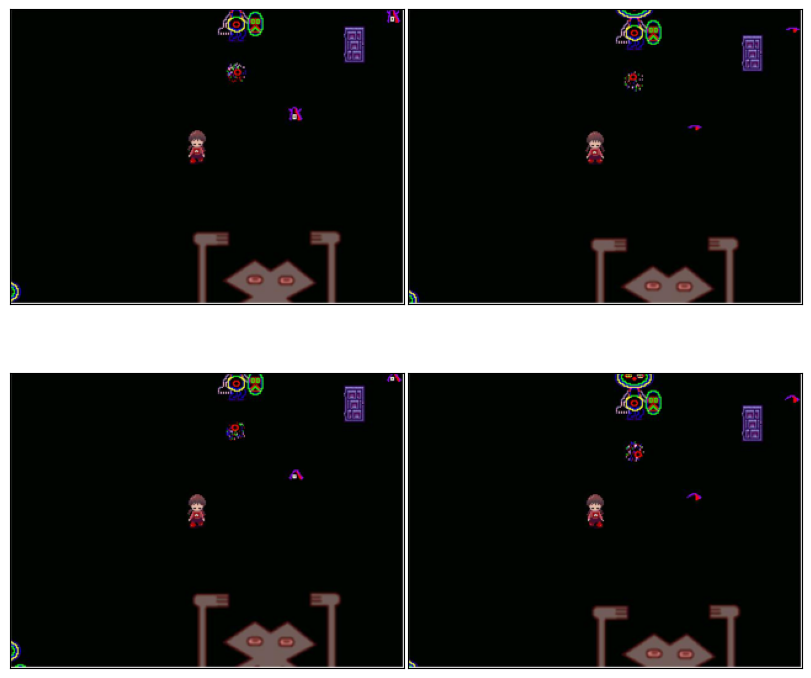

In [14]:
import PIL
import PIL.Image

images = [f for f in glob.glob('./trained/csgo/spawn/*/*') if f.endswith('.png')]
show_gridsq([PIL.Image.open(img) for img in images], factor=4.)

In [15]:
%matplotlib inline
os.chdir('outputs/2024-12-17/21-40-57')
%run ./src/play.py --colab

<frozen importlib._bootstrap>:241: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


{'wandb': {'mode': 'online', 'project': 'yume-nikki', 'entity': 'dweam', 'name': 'yn-0041', 'group': None, 'tags': None, 'notes': None}, 'initialization': {'path_to_ckpt': None, 'load_denoiser': True, 'load_rew_end_model': True, 'load_actor_critic': True}, 'common': {'devices': 'all', 'seed': None, 'resume': False}, 'checkpointing': {'save_agent_every': 5, 'num_to_keep': 11}, 'collection': {'train': {'num_envs': 1, 'epsilon': 0.01, 'num_steps_total': 100000, 'first_epoch': {'min': 5000, 'max': 10000, 'threshold_rew': 10}, 'steps_per_epoch': 100}, 'test': {'num_envs': 1, 'num_episodes': 4, 'epsilon': 0.0, 'num_final_episodes': 100}}, 'static_dataset': {'path': '${env.path_data_low_res}', 'ignore_sample_weights': True}, 'training': {'should': True, 'num_final_epochs': 1500, 'cache_in_ram': False, 'num_workers_data_loaders': 4, 'model_free': False, 'compile_wm': False}, 'evaluation': {'should': True, 'every': 20}, 'denoiser': {'training': {'num_autoregressive_steps': 4, 'start_after_epoch

Fetching 0 files: 0it [00:00, ?it/s]

/home/mluser/git/dweam/AI-MarioKart64/diamond/outputs/2024-12-17/21-40-57/src/agent.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  sd = torch.load(Path(path_to_ckpt), 


Environment actions:

z : interact
up : up
right : right
left : left
down : left

Controls:

 m  : switch control (human/replay)
 .  : pause/unpause
 e  : step-by-step (when paused)
 ⏎  : reset env
Esc : quit




Press enter to start 


SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0
SPAWN DIR ../../../trained/csgo/spawn/0


KeyboardInterrupt: 